In [9]:
### hello hello
#import time

import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [10]:
filepath = r"C:\Users\jacob\Desktop\port_vinho_dataset\vinho\data\WineQT.csv"
df = pd.read_csv(filepath)

In [11]:
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [13]:
df = df.drop('Id', axis=1)

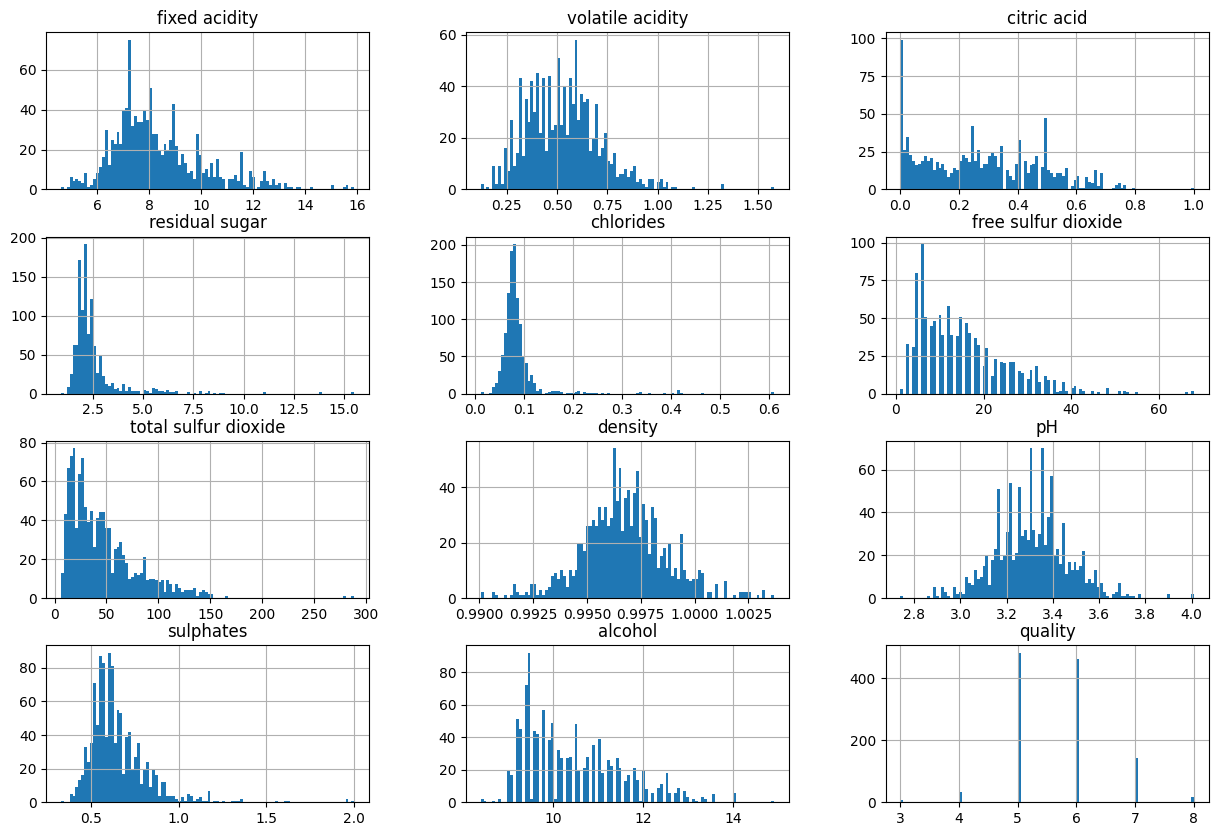

In [7]:
df[df >= 0].hist(bins=100, figsize=(15, 10))
plt.show()

In [14]:
from collections import Counter

count_counter = Counter(df['quality'])
print(count_counter)

Counter({5: 483, 6: 462, 7: 143, 4: 33, 8: 16, 3: 6})


In [15]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

df_2 = df.drop('quality', axis=1)

y = df['quality']
X = df_2


X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.3, random_state=42)

In [17]:
dclf = DummyClassifier(strategy='most_frequent', random_state=42)

dclf.fit(X_train, y_train)

y_pred = dclf.predict(X_val)

print(dclf.score(y_val, y_pred))

1.0


c:\Users\jacob\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jacob\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jacob\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

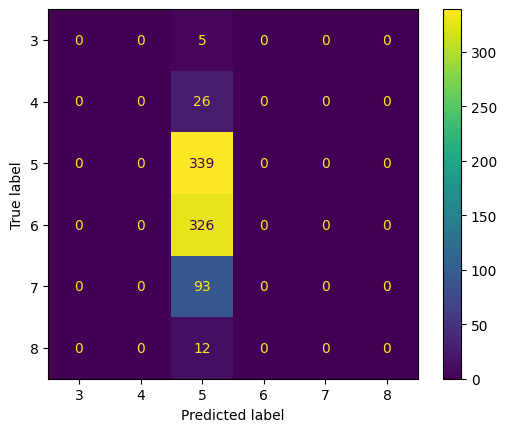

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        26
           5       0.42      1.00      0.59       339
           6       0.00      0.00      0.00       326
           7       0.00      0.00      0.00        93
           8       0.00      0.00      0.00        12

    accuracy                           0.42       801
   macro avg       0.07      0.17      0.10       801
weighted avg       0.18      0.42      0.25       801



In [18]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

cm =  confusion_matrix(y_val, y_pred, labels=dclf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dclf.classes_)

cr = classification_report(y_val, y_pred)

disp.plot()

plt.show()


print(cr)

In [1]:
df.info()

NameError: name 'df' is not defined

In [19]:

df_2 = df.drop('quality', axis=1)

y = df['quality']
X = df_2


X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.3, random_state=42)

In [22]:
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier(random_state=42)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_val)

print(accuracy_score(y_val, y_pred))

0.5942571785268415


c:\Users\jacob\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jacob\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jacob\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

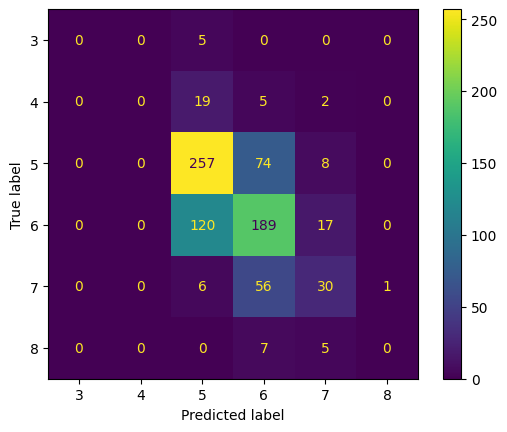

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        26
           5       0.63      0.76      0.69       339
           6       0.57      0.58      0.58       326
           7       0.48      0.32      0.39        93
           8       0.00      0.00      0.00        12

    accuracy                           0.59       801
   macro avg       0.28      0.28      0.28       801
weighted avg       0.56      0.59      0.57       801



In [23]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

cm =  confusion_matrix(y_val, y_pred, labels=rfc.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)

cr = classification_report(y_val, y_pred)

disp.plot()

plt.show()


print(cr)

In [28]:

df_2 = df.drop('quality', axis=1)
one_hot = pd.get_dummies(df['quality'])
y = one_hot
X = df_2


X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.3, random_state=42)

In [29]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_val)

print(accuracy_score(y_val, y_pred))

0.48314606741573035


c:\Users\jacob\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jacob\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


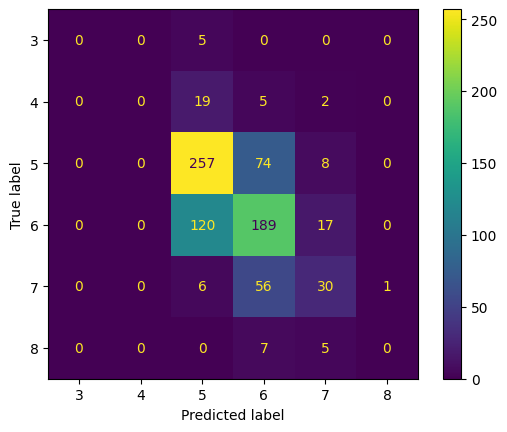

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.12      0.04      0.06        26
           2       0.66      0.73      0.70       339
           3       0.57      0.40      0.47       326
           4       0.50      0.40      0.44        93
           5       0.00      0.00      0.00        12

   micro avg       0.61      0.52      0.56       801
   macro avg       0.31      0.26      0.28       801
weighted avg       0.58      0.52      0.54       801
 samples avg       0.50      0.52      0.51       801



In [32]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

#cm =  confusion_matrix(y_val, y_pred, labels=xgb.classes_)

#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)

cr = classification_report(y_val, y_pred)

disp.plot()

plt.show()


print(cr)

## regression attempt




In [11]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

df_2 = df.drop('quality', axis=1)

y = df['quality']
X = df_2


X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.3, random_state=42)

In [15]:
from sklearn.dummy import DummyRegressor
dr = DummyRegressor()

dr.fit(X_train, y_train)

y_pred = dr.predict(X_val)

print(dr.score(y_val, y_pred))

1.0


In [18]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

cm =  confusion_matrix(y_val, y_pred, labels=dr.constant_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dr.constant_)

cr = classification_report(y_val, y_pred)

disp.plot()

plt.show()


print(cr)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets